## K-Nearest Neighbors(KNN) PostClass

### KNN Theory
1. Hem classification hem de regression yapabilen bir modeldir.
2. Eğitime ihtiyaç duymayan bir modeldir. Data noktalarını direk hafızasına atarak map'leme yapar. Yeni gelen data'nın diğer gözlemlere uzaklığını hesaplayarak tahmin yapar.
3. Non-parametric'dir. Yani coefficient'lar yoktur.
4. Non-linear bir modeldir herhangi bir assumption'ı yoktur.
5. Düşük boyutlu datasetlerinde tercih edilir. Büyük boyutlu datasetlerinde hesaplama maliyeti büyük olur.
6. Genel olara Fault Detection ve Recommender System'lerde kullanılır.
7. Distance based bir modeldir ve distance based modellerde scaling çok önemlidir.
8. Dengeli dağılım gösteren datasetlerinde(target feature için) Accuracy'e bakılarak yorum yapılabilir.
9. Dengesiz dağılım gösteren datasetlerinde(target feature için) Recall, Precision ve F1' e bakarak yorum yapılır.

### KNN Pros:
1. Herhangi bir assumption yok.
2. Anlaması ve uygulaması kolay.
3. Eğitime ihtiyacı yok(Lazy Learner).
4. Mesafe seçimlerinde flexible.
5. Hem classification hem de regression modeli var.

### KNN Cons:
1. Büyük datalarda(multidimensional) çok iyi modelleme yapamaz.
2. Outlier'lara karşı hassastır.
3. Imbalance datasetlerinden olumsuz etkilenir.
4. Modelin overfit ve underfit olma durumu var.
5. Scaling isteyen  bir model.

### KNN Hyperparameters
1. k:
    - En yakın k sayısı kadar komşusuna bakar.
    - Eğer k'yı çok küçük seçersek overfit olur. k'yı çok yüksek seçersek de underfitting olur.
    - Ayrıca büyük k seçmenin hesaplama maliyeti de büyük olur.
    - K seçiminde 2 metod vardır. Birisi Elbow diğeri GridSearch.
        1. Elbow Method:
            - k'yı seçerken error rate(1-accuracy)' e bakılır.
            - Minimum hatayı bulacağız ancak k' yı da çok küçük veya çok büyük seçmeyeceğiz.
        2. GridSearch Method:
            - GridSearch hatanın minimum olduğu noktadaki k değerini seçer.
            - Genelde kaynaklar, GridSearch'in bulduğu k değerini seçmemeyi önerir. Çünkü k'yı büyük tercih ediyor olabilir.
2. weight:
    - "uniform" ya da "distance" olarak 2 seçenekten biri seçilebilir.
        1. Uniform:
            - Majority voting yapar. Yani etrafındaki bütün gözlemlere eşit ağırlık verir ve en çok hangi gözlem varsa ona atama yapar.
        2. Distance:
            - Weighted majority voting yapar. Yani etrafındaki gözlemlere mesafeye göre ağırlık verir, yakın olanın katsayısı büyük olurken uzak olanın katsayısı küçük olur.
3. metric:
    - Mesafeleri ölçerken metric'imizin ne olacağını belirlemek için kullanılır. Default olarak "Minkowski" seçilidir ve bunun için de 2 adet p değerinden biri seçilir.
        1. p = 1 (Manhattan):
            - Bu durumda dataya en kısa yoldan değil de dolaşarak uzanır.
            - Dataya en kısa yoldan değil dolaşarak gittiği için outlier ile iyi mücadele eder.
            - Multidimensional durumda(feature sayısı çok) tercih edilir.
        2. p = 2 (Euclidean):
            - Bu durumda dataya en kısa yoldan(hipotenüs) uzanır.
            - Outlier'a karşı hassas değildir.
            - Small Dimensional(feature sayısı az) durumda tercih edilir.
            

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10, 6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

In [2]:
df = pd.read_csv("gene_expression.csv")
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


### Exploratory Data Analysis and Visualization

In [3]:
df.shape

(3000, 3)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gene One        3000 non-null   float64
 1   Gene Two        3000 non-null   float64
 2   Cancer Present  3000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 70.4 KB


In [6]:
df["Cancer Present"].value_counts()
# %100 Balance 

1    1500
0    1500
Name: Cancer Present, dtype: int64

In [7]:
df.describe()

,Gene One,Gene Two,Cancer Present
count,3000.000000,3000.000000,3000.000000
mean,5.600133,5.410467,0.500000
std,1.828388,1.729081,0.500083
min,1.000000,1.000000,0.000000
25%,4.300000,4.000000,0.000000
50%,5.600000,5.400000,0.500000
75%,6.900000,6.700000,1.000000
max,10.000000,10.000000,1.000000


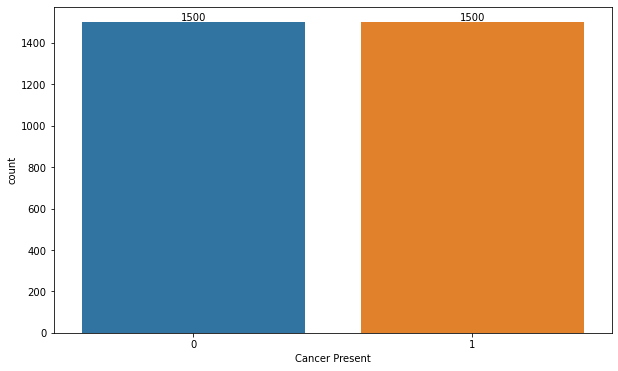

In [9]:
ax = sns.countplot(df["Cancer Present"])
ax.bar_label(ax.containers[0]);

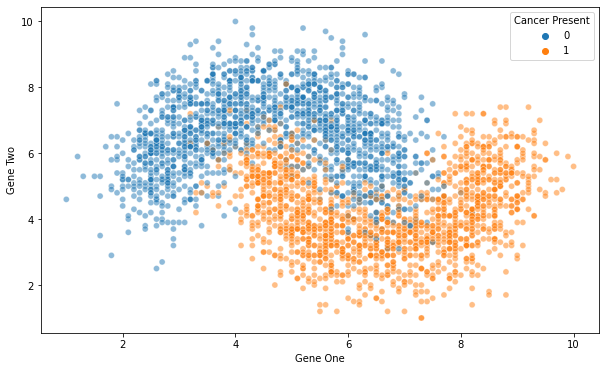

In [12]:
sns.scatterplot(x = "Gene One", y = "Gene Two", hue = "Cancer Present", data = df, alpha=0.5);
# Burada 1 ve 0 değerleri birbirinden tam anlamıyla ayrılamamış gözüküyor.
# Ancak burada 2 boyutlu olarak baktık ve bu yanıltıcı olabilir. 3 boyutlu bakmakta fayda var.

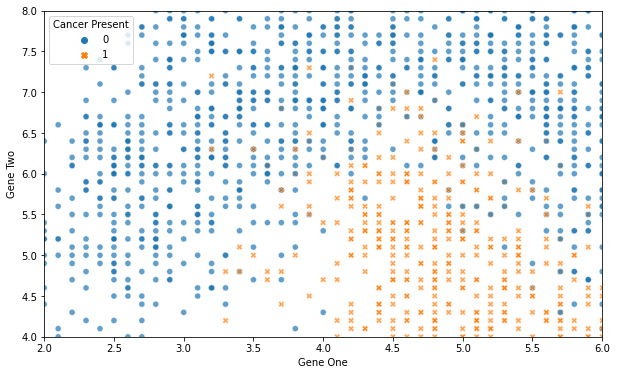

In [15]:
sns.scatterplot(x='Gene One',y='Gene Two',hue='Cancer Present',data=df, alpha=0.7, style= "Cancer Present")
plt.xlim(2,6)
plt.ylim(4,8);
# Bu grafikten iç içe geçen kısımları daha rahat görebiliyoruz.

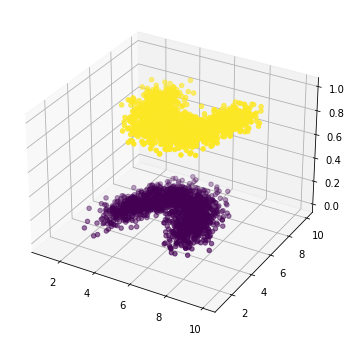

In [22]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = "3d")
ax.scatter(df["Gene One"], df["Gene Two"], df["Cancer Present"], c = df["Cancer Present"]);

# Burada c = df["Cancer Present"] yazarak kanser olma ve olmama durumuna göre renklendirmesini istedik.
# 3 boyutlu grafikten de anlaşılacağı gibi 1 ve 0 durumları aslında birbirinden net bir şekilde ayrılıyor.

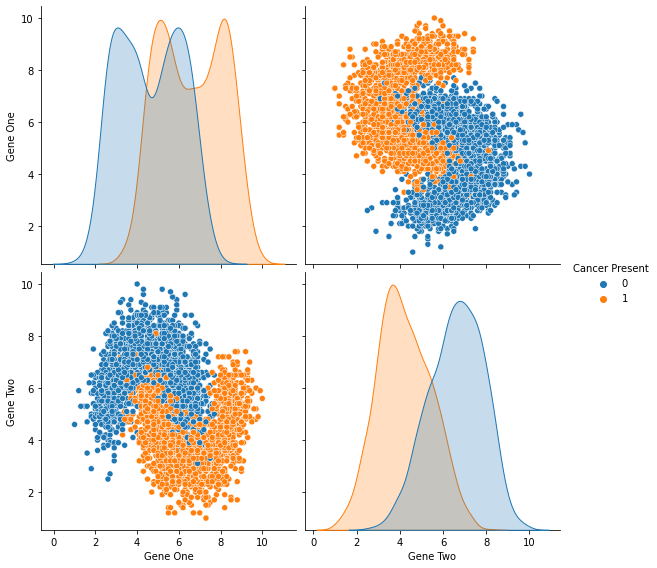

In [27]:
sns.pairplot(data = df, hue = "Cancer Present", height=4);
# Burada gene one ve gene two olarak ikisinin de kesişiminde bellirli bir alan olduğunu görüyoruz.
# Yani modelimiz belli bir hata oranına sahip olacak bunu öngörüyoruz. Kesin bir ayrışma yok.

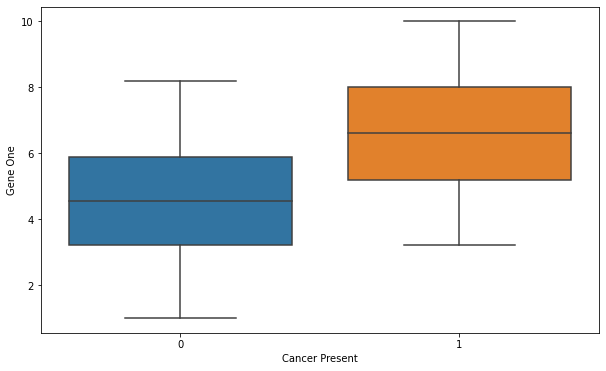

In [28]:
sns.boxplot(data=df, x= "Cancer Present", y = "Gene One");
# Burada gen one dağılımına bakınca özellikle gene one değeri 6 sonrası cancer olma durumu olduğunu görüyoruz.

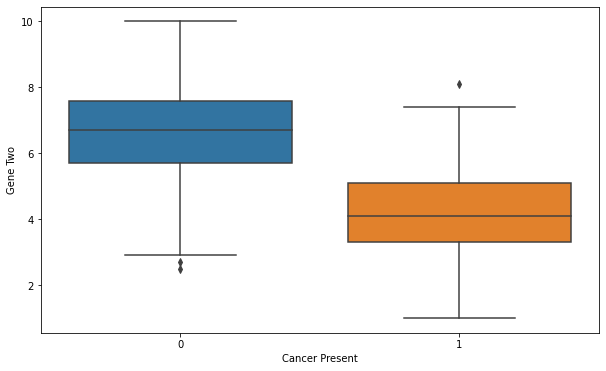

In [31]:
sns.boxplot(data=df, x= "Cancer Present", y = "Gene Two");
# Gene two için de özellikle 5'ten sonra cancer olmama durumu çok yüksek gözüküyor.

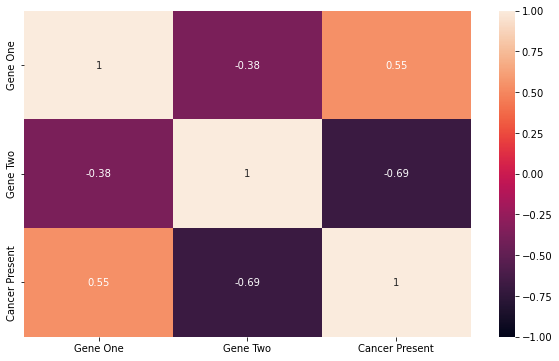

In [36]:
sns.heatmap(df.corr(), annot=True, vmin=-1);
# Buradan datada collinearity durumu olmadığını ve gene two' nun cancer durumunu belirlemede daha etkili olduğu görülüyor.

### Train - Test Split and Scaling Data

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [39]:
# Aslında datayı scale etmek zorunda değiliz gibi gözüküyor. Çünkü hem gen 1 hem de gen 2, 1 ile 10 aralığında değişiyor.
# Ancak scaling yapmanın bir zararı yok, alışkanlık olarak yapmaya devam etmek gerekir.

In [40]:
X = df.drop(columns="Cancer Present")
y = df["Cancer Present"]

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [42]:
scaler = StandardScaler()

In [44]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Modelling

In [45]:
from sklearn.neighbors import KNeighborsClassifier

In [46]:
knn_model = KNeighborsClassifier(n_neighbors=5) 
# Burada n_neighbors = 5, k değerinin 5 olduğunu belirtir. Default değeri de 5'tir.
# En yakın 5 komşuya bakacaktır.

In [47]:
knn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [52]:
y_pred = knn_model.predict(X_test_scaled)
y_pred[:20]

array([1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0],
      dtype=int64)

In [53]:
y_pred_proba = knn_model.predict_proba(X_test_scaled)

In [54]:
pd.DataFrame(y_pred_proba)

,0,1
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,1.0,0.0
4,1.0,0.0
...,...,...
895,0.4,0.6
896,1.0,0.0
897,0.0,1.0
898,0.0,1.0


In [56]:
my_dict = {"Actual" : y_test, "Pred" : y_pred, "Proba_1" : y_pred_proba[:,1], "Proba_0" : y_pred_proba[:, 0]}

In [58]:
pd.DataFrame(my_dict)[:20]

,Actual,Pred,Proba_1,Proba_0
1801,1,1,1.0,0.0
1190,1,1,1.0,0.0
1817,1,1,1.0,0.0
251,0,0,0.0,1.0
2505,0,0,0.0,1.0
1117,1,1,1.0,0.0
1411,0,1,0.6,0.4
2113,1,0,0.0,1.0
408,0,0,0.0,1.0
2579,1,1,1.0,0.0


### Model Performance on Classification Tasks

In [59]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

In [60]:
confusion_matrix(y_test, y_pred)

array([[439,  31],
       [ 34, 396]], dtype=int64)

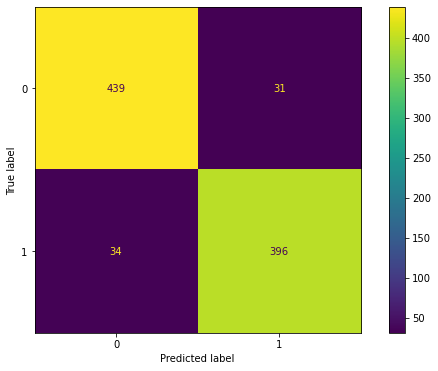

In [61]:
plot_confusion_matrix(knn_model, X_test_scaled, y_test);

In [62]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Bu data özelinde dağılım eşit olduğu için accuracy üzerinden değerlendirme yapabiliriz.

[[439  31]
 [ 34 396]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       470
           1       0.93      0.92      0.92       430

    accuracy                           0.93       900
   macro avg       0.93      0.93      0.93       900
weighted avg       0.93      0.93      0.93       900



In [64]:
y_train_pred = knn_model.predict(X_train_scaled)
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

# Burada train ve test score'larını karşılaştırdığımızda birbirine yakın accuracy değerleri olduğunu görüyoruz.

[[ 971   59]
 [  61 1009]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      1030
           1       0.94      0.94      0.94      1070

    accuracy                           0.94      2100
   macro avg       0.94      0.94      0.94      2100
weighted avg       0.94      0.94      0.94      2100



### Elbow Method for Choosing Reasonable K Values

In [65]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

In [69]:
test_error_rates = []
for k in range(1, 400): # Burada optimal k yı bulabilmek için 1-400 arasını yazdık. DAha düşük bir aralık da yazılabilir.
    knn_model = KNeighborsClassifier(n_neighbors = k)
    knn_model.fit(X_train_scaled, y_train)
    
    y_pred_test = knn_model.predict(X_test_scaled)
    
    test_error = 1 - accuracy_score(y_test, y_pred_test)
    
    test_error_rates.append(test_error)

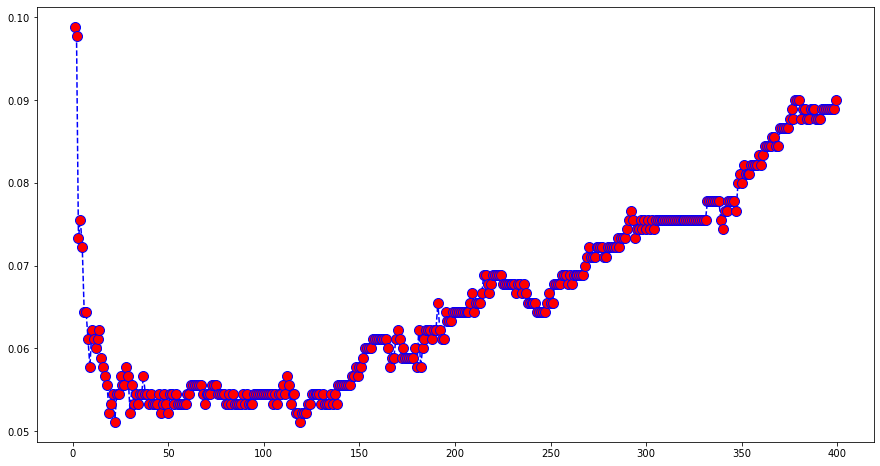

In [71]:
plt.figure(figsize=(15, 8))
plt.plot(range(1, 400), test_error_rates, color="blue", linestyle="--", marker ="o", markerfacecolor="red", markersize=10);

# Burada özellikle 100'dan sonra hatamızın arttığını yani underfitting' e doğru gittiğini görüyoruz.
# 1-50 arasına bakacağım orada hataların değeri uygun aralıkta.

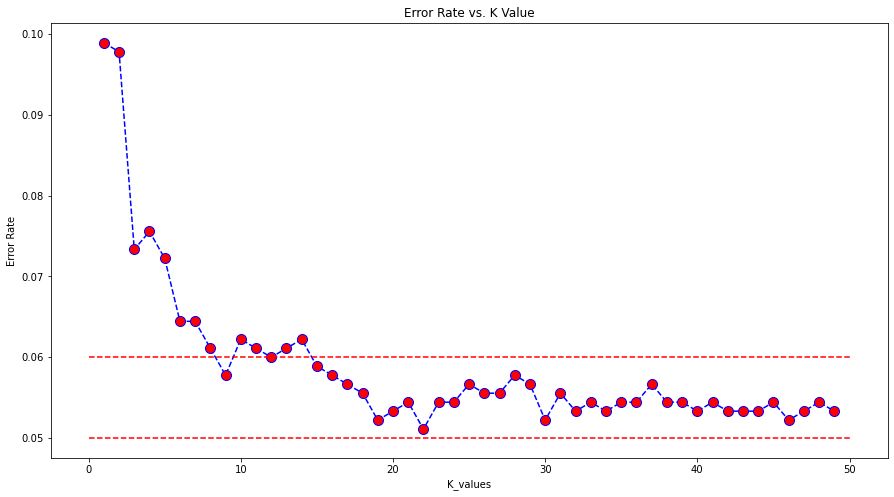

In [75]:
test_error_rates = []
for k in range(1, 50): # Burada optimal k yı bulabilmek için 1-400 arasını yazdık. DAha düşük bir aralık da yazılabilir.
    knn_model = KNeighborsClassifier(n_neighbors = k)
    knn_model.fit(X_train_scaled, y_train)
    
    y_pred_test = knn_model.predict(X_test_scaled)
    
    test_error = 1 - accuracy_score(y_test, y_pred_test)
    
    test_error_rates.append(test_error)

# Plotting   
plt.figure(figsize=(15, 8))
plt.plot(range(1, 50), test_error_rates, color="blue", linestyle="--", marker ="o", markerfacecolor="red", markersize=10)

plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')

plt.hlines(y = 0.050, xmin=0, xmax=50, colors="r", linestyles="--")
plt.hlines(y = 0.060, xmin=0, xmax=50, colors="r", linestyles="--");

# Burada k değerine karar verirken hesaplama maliyetini göz önüne alarak karar vermek gerekir.
# Mselea k=22 için 1-50 arası en az hata gözüküyor. Onu seçmek dağa iyi gözüküyor. 
# Ancak sadece %1'lik bir hata artışını mazur görerek k = 9 da seçilebilir. 
# Burada kanser teşhisi üzerine çalıştığımız için k=21-22 değerlerinden birini seçmek ve maliyete katlanmak istiyorum.
# Ancak karar vermeden önce birkç analiz daha yapcağız.

### Overfitting and Underfitting Control for k Values

In [80]:
test_error_rates = []
train_error_rates = []


for k in range(1,50):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train_scaled,y_train) 
   
    y_pred_test = knn_model.predict(X_test_scaled)
    y_pred_train = knn_model.predict(X_train_scaled)
    
    test_error = 1 - accuracy_score(y_test,y_pred_test)
    train_error = 1 - accuracy_score(y_train,y_pred_train)
    
    test_error_rates.append(test_error)
    train_error_rates.append(train_error)

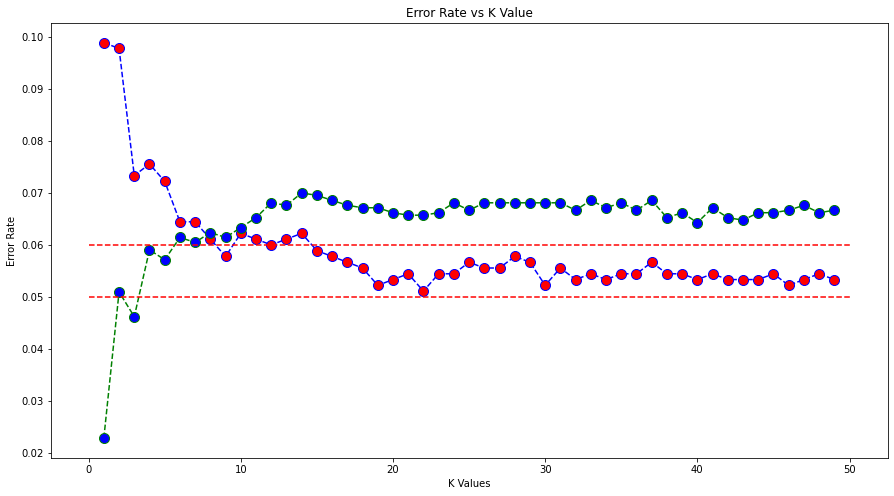

In [81]:
plt.figure(figsize = (15, 8))
plt.plot(range(1, 50), test_error_rates, color="blue", linestyle="--", marker="o", markerfacecolor="red", markersize=10)
plt.plot(range(1, 50), train_error_rates, color="green", linestyle="--", marker="o", markerfacecolor="blue", markersize=10)

plt.title("Error Rate vs K Value")
plt.xlabel("K Values")
plt.ylabel("Error Rate")

plt.hlines(y = 0.05, xmin =0 , xmax = 50, colors="r", linestyles="--")
plt.hlines(y = 0.06, xmin =0, xmax=50, colors="r", linestyles="--");

# Bu grafiğe baktığımızda train ve test errorlarının birbirine en yakın olduğu k değeri 9 gözüküyor.

### Scores by Varios K values

In [82]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set\n")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set\n")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [83]:
knn = KNeighborsClassifier(n_neighbors=1)   # n_neighbors=1, test_accuracy : 91  (with 99 error)

knn.fit(X_train_scaled, y_train)
print("WITH K=1\n")
eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)

# Test ve train arasında accuracy score farkı 0.08.  Overfitting durumu var . Ayrıca test setindeki hata sayısı 99.

WITH K=1

Test_Set

[[426  44]
 [ 45 385]]
              precision    recall  f1-score   support

           0       0.90      0.91      0.91       470
           1       0.90      0.90      0.90       430

    accuracy                           0.90       900
   macro avg       0.90      0.90      0.90       900
weighted avg       0.90      0.90      0.90       900


Train_Set

[[1003   27]
 [  21 1049]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1030
           1       0.97      0.98      0.98      1070

    accuracy                           0.98      2100
   macro avg       0.98      0.98      0.98      2100
weighted avg       0.98      0.98      0.98      2100



In [84]:
knn = KNeighborsClassifier(n_neighbors=9)                   # n_neighbors=9, test_accuracy : 94  (with 52 error)

knn.fit(X_train_scaled,y_train)
print('WITH K=9\n')
eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)

# Burada hem test hem de train için accuracy score'u 0.94' e eşit. Ayrıca test datasındaki toplam eror sayısı:52

WITH K=9

Test_Set

[[446  24]
 [ 28 402]]
              precision    recall  f1-score   support

           0       0.94      0.95      0.94       470
           1       0.94      0.93      0.94       430

    accuracy                           0.94       900
   macro avg       0.94      0.94      0.94       900
weighted avg       0.94      0.94      0.94       900


Train_Set

[[ 961   69]
 [  60 1010]]
              precision    recall  f1-score   support

           0       0.94      0.93      0.94      1030
           1       0.94      0.94      0.94      1070

    accuracy                           0.94      2100
   macro avg       0.94      0.94      0.94      2100
weighted avg       0.94      0.94      0.94      2100



In [85]:
knn = KNeighborsClassifier(n_neighbors=22)         # n_neighbors=22, test_accuracy : 95  (with 46 error)

knn.fit(X_train_scaled,y_train)
print('WITH K=22\n')
eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)

#Burada test score'u 95 iken train score'u 93. Ayrıca test datasındaki toplam hata sayısı 46.

WITH K=22

Test_Set

[[452  18]
 [ 28 402]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       470
           1       0.96      0.93      0.95       430

    accuracy                           0.95       900
   macro avg       0.95      0.95      0.95       900
weighted avg       0.95      0.95      0.95       900


Train_Set

[[ 960   70]
 [  68 1002]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1030
           1       0.93      0.94      0.94      1070

    accuracy                           0.93      2100
   macro avg       0.93      0.93      0.93      2100
weighted avg       0.93      0.93      0.93      2100



In [87]:
# Sonuç olarak burada k = 22 ile yoluma devam etmeyi düşünüyorum. sadece %1 lik puan farkı olsa da benim için önemli.
#Ayrıca test ve train arasındaki score farkı kabul edilebilir.
# Ancak son kararı Cross Validation sonrası gerçek score'larımı öğrendikten sonra vereceğim.

### Cross Validate for Otimal K Value

In [86]:
from sklearn.model_selection import cross_val_score, cross_validate

In [88]:
model = KNeighborsClassifier(n_neighbors = 9)

scores = cross_validate(model, X_train_scaled, y_train, scoring=["accuracy", "precision", "recall", "f1"], cv =10)

df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
1,0.001991,0.006062,0.923810,0.933333,0.915888,0.924528
2,0.001000,0.007962,0.947619,0.944444,0.953271,0.948837
3,0.000993,0.003992,0.947619,0.970588,0.925234,0.947368
4,0.000000,0.004981,0.866667,0.876190,0.859813,0.867925
5,0.001000,0.003983,0.923810,0.909910,0.943925,0.926606
6,0.000000,0.005044,0.919048,0.924528,0.915888,0.920188
7,0.000000,0.005981,0.942857,0.927928,0.962617,0.944954
8,0.000997,0.003916,0.938095,0.927273,0.953271,0.940092
9,0.000000,0.004964,0.961905,0.980583,0.943925,0.961905
10,0.000999,0.002986,0.890476,0.868421,0.925234,0.895928


In [91]:
df_scores.mean()[2:]
# Burada k = 9 için train accuracy score'um 92 çıktı. Test score'um 94 idi.

test_accuracy     0.926190
test_precision    0.926320
test_recall       0.929907
test_f1           0.927833
dtype: float64

In [92]:
model = KNeighborsClassifier(n_neighbors = 22)

scores = cross_validate(model, X_train_scaled, y_train, scoring=["accuracy", "precision", "recall", "f1"], cv =10)

df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
1,0.000944,0.005980,0.933333,0.942857,0.925234,0.933962
2,0.001023,0.005964,0.957143,0.945455,0.971963,0.958525
3,0.001008,0.005968,0.947619,0.970588,0.925234,0.947368
4,0.001067,0.003985,0.861905,0.867925,0.859813,0.863850
5,0.000000,0.004966,0.938095,0.943396,0.934579,0.938967
6,0.001142,0.004855,0.909524,0.907407,0.915888,0.911628
7,0.000993,0.003979,0.933333,0.926606,0.943925,0.935185
8,0.000928,0.005059,0.933333,0.934579,0.934579,0.934579
9,0.000990,0.003921,0.947619,0.980000,0.915888,0.946860
10,0.001061,0.004988,0.904762,0.884956,0.934579,0.909091


In [93]:
df_scores.mean()[2:] 
# Burada k = 22 için train accuracy score'um 92 çıktı. Test score'um 93 idi.

test_accuracy     0.926667
test_precision    0.930377
test_recall       0.926168
test_f1           0.928002
dtype: float64

In [95]:
# Sonuç olarak k değerini 9 seçmeye karar verdim.

### Predict New Observation

In [96]:
new_observation = [[3.5, 4.3]]

In [97]:
knn_model.predict(new_observation)

array([1], dtype=int64)

In [99]:
knn_model.predict_proba(new_observation)
# Burada observation değerlerini girdi olarak aldı ve %55 olasılıkla target' ı 1 tahmin etti.
# Ancak burada modelim scale edildiği için new_observation'ı da scale etmem gerekirdi.
# Scaling unutulursa sonuç değişebilir. Bakalım scaling sonrası sonucumuz ne olacak.

array([[0.44897959, 0.55102041]])

In [101]:
new_observation_scaled = scaler.transform(new_observation)
new_observation_scaled

array([[-1.1393583 , -0.62176572]])

In [102]:
knn_model.predict(new_observation_scaled)

array([0], dtype=int64)

In [103]:
knn_model.predict_proba(new_observation_scaled)
# Bu sefer %63 olasılıkla sonucumu 0 tahmin etti...
# Scaling önemli.. unutmamalı.

array([[0.63265306, 0.36734694]])

### GridSearch Method for Choosing Reasonable K values

In [104]:
from sklearn.model_selection import GridSearchCV

In [105]:
knn_grid = KNeighborsClassifier()

In [106]:
k_values = range(1, 50)

In [107]:
param_grid = {"n_neighbors" : k_values, "p" : [1,2], "weights" : ["uniform", "distance"]}
# Burada GridSearch ile ayrıca diğer parametrelerin de optimal değerlerini bulacağız.

In [108]:
knn_grid_model = GridSearchCV(knn_grid, param_grid, cv =10, scoring="accuracy")
# Burada datamız target içinde eşit sayıda dağıldığı için scoring olarak accuracy seçtik.

In [109]:
knn_grid_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 50), 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [111]:
knn_grid_model.best_params_
# Burada görüldüğü gibi k için 41 seçti. Çok yüksek bir sayı.

{'n_neighbors': 41, 'p': 2, 'weights': 'uniform'}

In [112]:
print('WITH K=41\n')
eval_metric(knn_grid_model, X_train_scaled, y_train, X_test_scaled, y_test)
# 41 için score'lara baktığımızda k=9 ile arasında neredeyse fark yok.

WITH K=41

Test_Set

[[450  20]
 [ 29 401]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       470
           1       0.95      0.93      0.94       430

    accuracy                           0.95       900
   macro avg       0.95      0.95      0.95       900
weighted avg       0.95      0.95      0.95       900


Train_Set

[[ 956   74]
 [  67 1003]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1030
           1       0.93      0.94      0.93      1070

    accuracy                           0.93      2100
   macro avg       0.93      0.93      0.93      2100
weighted avg       0.93      0.93      0.93      2100



### Evaluating ROC Curves and AUC

In [113]:
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, plot_roc_curve, roc_auc_score, roc_curve

In [114]:
knn_model = KNeighborsClassifier(n_neighbors=9).fit(X_train_scaled, y_train)

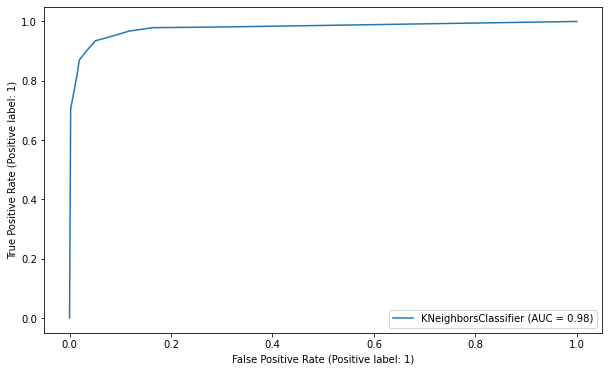

In [116]:
plot_roc_curve(knn_model, X_test_scaled, y_test);

In [117]:
y_pred_proba = knn_model.predict_proba(X_test_scaled)
roc_auc_score(y_test, y_pred_proba[:, 1])

0.9781296387926769

### Final Model and Deployment

In [118]:
import pickle

In [119]:
scaler = StandardScaler()

In [120]:
scaler.fit(X)
# Burada scaler'ı tüm X üzerinde yapıyoruz.
# Final aşamada artık test_train ayrımına gidilmez tüm data ile scaling ve fitting yapılır

StandardScaler()

In [121]:
X_scaled = scaler.transform(X)

In [122]:
knn_grid_model.best_params_

{'n_neighbors': 41, 'p': 2, 'weights': 'uniform'}

In [124]:
final_knn_model = KNeighborsClassifier(n_neighbors=9, weights="uniform",p = 2).fit(X_scaled, y)
# Burada GridSearch sonrası çıkan optimal değerlerle modelimi eğiteceeğim. Sadece k = 41 yerine k = 9 uygun gördüm.

In [125]:
pickle.dump(final_knn_model, open("knn_final.pkl", "wb"))
# Burada modelimizin turşusunu kurduk ve rafa kaldırdık. 

In [127]:
pickle.dump(scaler, open("scaler_knn.pkl", "wb"))
# Burada da scaler' a aynı işlemleri uyguladık

### Predict New Observations

In [128]:
loaded_scaler = pickle.load(open("scaler_knn.pkl", "rb"))
# Burada yeni bi observation hakkında tahmin yapabilmek için scaler'ı çağırdık. 
# Scaler'ı çağırdık çünkü yeni observation' ı scale edip sonra modele sokmalıyız Çünkü model de scale edildi.

In [131]:
loaded_model = pickle.load(open("knn_final.pkl", "rb"))
# Burada da model'i çağırdık

In [132]:
X.columns

Index(['Gene One', 'Gene Two'], dtype='object')

In [134]:
X.describe()

,Gene One,Gene Two
count,3000.000000,3000.000000
mean,5.600133,5.410467
std,1.828388,1.729081
min,1.000000,1.000000
25%,4.300000,4.000000
50%,5.600000,5.400000
75%,6.900000,6.700000
max,10.000000,10.000000


In [135]:
# Burada columnn's sıralmasına ve describe'a baktık çünkü modele tahmin etmesini istediğim observationları 
    # buradaki colum sırasına göre ve buradaki min-max aralıklarına göre belirleyeceğim

In [144]:
new_obs = {"Gene One" : [1, 3, 4.3, 5.6, 7, 9.5, 2],
           "Gene Two" : [1, 4, 4, 5.5, 6.7, 10, 8]}

In [145]:
samples = pd.DataFrame(new_obs)
samples

,Gene One,Gene Two
0,1.0,1.0
1,3.0,4.0
2,4.3,4.0
3,5.6,5.5
4,7.0,6.7
5,9.5,10.0
6,2.0,8.0


In [146]:
samples_scaled = loaded_scaler.transform(samples)
samples_scaled

array([[-2.51637037e+00, -2.55118325e+00],
       [-1.42232801e+00, -8.15868071e-01],
       [-7.11200471e-01, -8.15868071e-01],
       [-7.29361574e-05,  5.17895174e-02],
       [ 7.65756716e-01,  7.45915588e-01],
       [ 2.13330967e+00,  2.65476228e+00],
       [-1.96934919e+00,  1.49788550e+00]])

In [147]:
predictions = loaded_model.predict(samples_scaled)
predictions_proba = loaded_model.predict_proba(samples_scaled)

In [148]:
samples["pred"] = predictions
samples["pred_proba_1"] = predictions_proba[:, 1]
samples["pred_proba_0"] = predictions_proba[:, 0]
samples

,Gene One,Gene Two,pred,pred_proba_1,pred_proba_0
0,1.0,1.0,0,0.000000,1.000000
1,3.0,4.0,0,0.111111,0.888889
2,4.3,4.0,1,1.000000,0.000000
3,5.6,5.5,0,0.222222,0.777778
4,7.0,6.7,0,0.000000,1.000000
5,9.5,10.0,1,0.666667,0.333333
6,2.0,8.0,0,0.000000,1.000000


### Extra - Pipeline
Pipeline ile işlemlerimizi pipeline içine dizerek çok daha kısa bir şekilde yapabiliriz. Burada onu deneyeceğiz.

What happens can be described as follows:

Step 1: The data are split into TRAINING data and TEST data according to ratio of train_test_split

Step 2: the scaler is fitted on the TRAINING data

Step 3: the scaler transforms TRAINING data

Step 4: the models are fitted/trained using the transformed TRAINING data

Step 5: the scaler is used to transform the TEST data

Step 6: the trained models predict using the transformed TEST data


pipe.fit(X_train, y_train)--> scaler.fit_transform(X_train) --> knn.fit(scaled_X_train, y_train)

pipe.predict(X_test)      --> scaler.transform(X_test)      --> knn.predict(scaled_X_test)

In [149]:
from sklearn.pipeline import Pipeline

In [151]:
operations = [("scaler", StandardScaler()), ("knn", KNeighborsClassifier())]
# Burada operasyonları tanımlarken sıralama önemli. çünkü o sıralamaya göre işlem yapacak
# Burada önce scale edecek sonra model tanımlayacak.

In [152]:
Pipeline(steps = operations)

Pipeline(steps=[('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])

In [153]:
pipe_model = Pipeline(steps=operations)

In [155]:
pipe_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])

In [156]:
y_pred = pipe_model.predict(X_test)
y_pred[:20]

array([1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0],
      dtype=int64)

### Model Performance

In [157]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

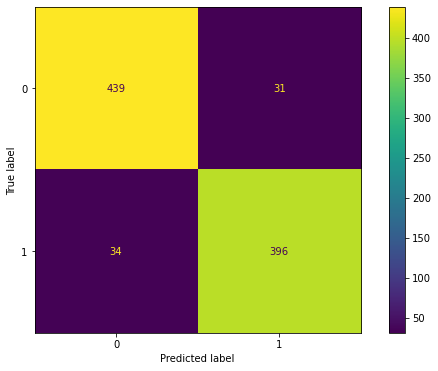

In [158]:
plot_confusion_matrix(pipe_model, X_test, y_test);

In [159]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

Test_Set

[[439  31]
 [ 34 396]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       470
           1       0.93      0.92      0.92       430

    accuracy                           0.93       900
   macro avg       0.93      0.93      0.93       900
weighted avg       0.93      0.93      0.93       900


Train_Set

[[ 971   59]
 [  61 1009]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      1030
           1       0.94      0.94      0.94      1070

    accuracy                           0.94      2100
   macro avg       0.94      0.94      0.94      2100
weighted avg       0.94      0.94      0.94      2100



### Changing the Parameters of the pipe_model

In [162]:
pipe_model.get_params()
# Pipeline sonrası parametrelerin ismi değişir. 
# Buradan da görüleceği gibi pipeline tanımlarken kullandığımız "scaler" ve "knn" i burada default parametrelerin başına ekledi.
# Buradaki parametreleri kullanarak değer ataması yapacağız.

{'memory': None,
 'steps': [('scaler', StandardScaler()), ('knn', KNeighborsClassifier())],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 5,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [163]:
pipe_model.set_params(knn__n_neighbors = 9)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=9))])

In [165]:
pipe_model.get_params
# yukarıda default k değerini 9 olarak değiştirdim ve burada kontrol ettim.

<bound method Pipeline.get_params of Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=9))])>

### GridSearch on Pipeline

In [166]:
from sklearn.model_selection import GridSearchCV

In [173]:
param_grid = {"knn__n_neighbors" : k_values, "knn__p" : [1, 2], "knn__weights" : ["uniform", "distance"]}

In [174]:
pipe_model = Pipeline(steps=operations)

In [175]:
pipe_grid = GridSearchCV(pipe_model, param_grid = param_grid, cv = 10, scoring = "accuracy")

In [176]:
pipe_grid.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn',
                                        KNeighborsClassifier(n_neighbors=9))]),
             param_grid={'knn__n_neighbors': range(1, 50), 'knn__p': [1, 2],
                         'knn__weights': ['uniform', 'distance']},
             scoring='accuracy')

In [177]:
pipe_grid.best_params_

{'knn__n_neighbors': 42, 'knn__p': 2, 'knn__weights': 'uniform'}

### Cross Validate on Pipeline

In [180]:
# cross validation öncesi modeli sıfırllamak iyi olur.
operations = [('scaler', StandardScaler()), ('knn', KNeighborsClassifier(n_neighbors=9, weights="uniform", p=2))]
model = Pipeline(operations)

In [181]:
scores = cross_validate(model, X_train, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision    0.925515
test_recall       0.930841
test_f1           0.927874
test_accuracy     0.926190
dtype: float64

### Final pipe_model

In [184]:
pipe_grid.best_params_
# final modeli buradaki best parametrelere göre kuruyorum. Ancak burada k değerini 9 olarak alacağım.

{'knn__n_neighbors': 42, 'knn__p': 2, 'knn__weights': 'uniform'}

In [185]:
operations = [('scaler',StandardScaler()),('knn',KNeighborsClassifier(n_neighbors=9, weights="uniform", p=2))]

In [186]:
pipe_final = Pipeline(operations)

In [187]:
pipe_final.fit(X, y) # Burada artık test_train ayırmadan tüm data ile fit yaptık.

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=9))])

### Predict New Observations with pipe_model

In [188]:
new_obs = {"Gene One": [1, 3, 4.3, 5.6, 7, 9.5, 2, 6],
           "Gene Two": [1, 4, 4, 5.5, 6.7, 10, 8, 1]
          }

In [189]:
samples = pd.DataFrame(new_obs)
samples

,Gene One,Gene Two
0,1.0,1.0
1,3.0,4.0
2,4.3,4.0
3,5.6,5.5
4,7.0,6.7
5,9.5,10.0
6,2.0,8.0
7,6.0,1.0


In [190]:
predictions = pipe_final.predict(samples)
predictions

array([0, 0, 1, 0, 0, 1, 0, 1], dtype=int64)

In [191]:
predictions_proba = pipe_final.predict_proba(samples)
predictions_proba

array([[1.        , 0.        ],
       [0.88888889, 0.11111111],
       [0.        , 1.        ],
       [0.77777778, 0.22222222],
       [1.        , 0.        ],
       [0.33333333, 0.66666667],
       [1.        , 0.        ],
       [0.        , 1.        ]])

In [192]:
samples["pred"] = predictions
samples["pred_proba"] = predictions_proba[:,1]
samples

,Gene One,Gene Two,pred,pred_proba
0,1.0,1.0,0,0.000000
1,3.0,4.0,0,0.111111
2,4.3,4.0,1,1.000000
3,5.6,5.5,0,0.222222
4,7.0,6.7,0,0.000000
5,9.5,10.0,1,0.666667
6,2.0,8.0,0,0.000000
7,6.0,1.0,1,1.000000
